<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline

from pylab import *
import matplotlib.pyplot as plt


Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## Create a first BN : bn

In [3]:
bn=gum.loadBN("res/asia.bif")
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs() 
bn

(pyAgrum.BayesNet<double>@0x564228616200) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

## Create a second BN : bn2

In [4]:
bn2=gum.loadBN("res/asia.bif")
bn2.generateCPTs()
bn2

(pyAgrum.BayesNet<double>@0x564228638a30) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

## bn vs bn2 : different parameters

In [5]:
gnb.flow.row(bn.cpt(3),bn2.cpt(3),
              captions=["a CPT in bn","same CPT in bn2 (with different parameters)"])

## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [6]:
g1=gum.ExactBNdistance(bn,bn2)
print(g1.compute())

{'klPQ': 5.0030971388003485, 'errorPQ': 0, 'klQP': 3.527314407069579, 'errorQP': 0, 'hellinger': 1.037499761443752, 'bhattacharya': 0.7726296131290553, 'jensen-shannon': 0.6385791723188207}


If the models are not on the same domain :

In [7]:
bn_different_domain=gum.loadBN("res/alarm.dsl")

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
#---------------------------------------------------------------------------
#OperationNotAllowed                       Traceback (most recent call last)
#
#OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

In [8]:
g=gum.GibbsBNdistance(bn,bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [9]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'klPQ': 4.999350547660979, 'errorPQ': 0, 'klQP': 3.309147414499417, 'errorQP': 0, 'hellinger': 1.0241904644545237, 'bhattacharya': 0.7786179301380848, 'jensen-shannon': 0.6228385613041574}
Computed in 0.995989463 s


--
stopped with epsilon=1e-07
--
Temps de calcul : 0.995989463
Nombre d'itérations : 176500


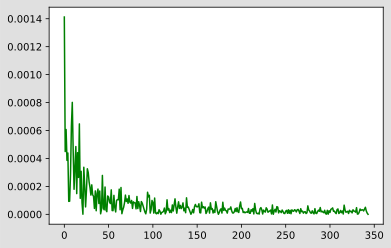

In [10]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

p=plot(g.history(), 'g')

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allows to follow the iteration using animated matplotlib figure

In [11]:
g=gum.GibbsBNdistance(bn,bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'klPQ': 5.016855829234866,
 'errorPQ': 0,
 'klQP': 3.3839420489270537,
 'errorQP': 0,
 'hellinger': 1.0291151959143872,
 'bhattacharya': 0.7805282966474169,
 'jensen-shannon': 0.6282516385879086}

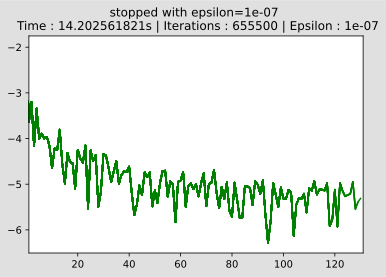

In [12]:
gnb.animApproximationScheme(g) # logarithmique scale for Y
g.compute()